In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
#from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score

In [2]:
# loading the data from csv files to a pandas dataframe
parkinsons_data = pd.read_csv('newPK.csv')

#printing the first 5 rows of the dataframe
parkinsons_data.head()

,Sno,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
# number of rows and columns in the data frame
parkinsons_data.shape

(6045, 24)

In [4]:
#getting more information about the data set
parkinsons_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6045 entries, 0 to 6044
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sno               6045 non-null   int64  
 1   MDVP:Fo(Hz)       6045 non-null   float64
 2   MDVP:Fhi(Hz)      6045 non-null   float64
 3   MDVP:Flo(Hz)      6045 non-null   float64
 4   MDVP:Jitter(%)    6045 non-null   float64
 5   MDVP:Jitter(Abs)  6045 non-null   float64
 6   MDVP:RAP          6045 non-null   float64
 7   MDVP:PPQ          6045 non-null   float64
 8   Jitter:DDP        6045 non-null   float64
 9   MDVP:Shimmer      6045 non-null   float64
 10  MDVP:Shimmer(dB)  6045 non-null   float64
 11  Shimmer:APQ3      6045 non-null   float64
 12  Shimmer:APQ5      6045 non-null   float64
 13  MDVP:APQ          6045 non-null   float64
 14  Shimmer:DDA       6045 non-null   float64
 15  NHR               6045 non-null   float64
 16  HNR               6045 non-null   float64


In [5]:
#checking for missing values in each colun 
parkinsons_data.isnull().sum()

Sno                 0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
# getting some statistical measures about the data
parkinsons_data.describe()

,Sno,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,6045.00000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,...,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000
mean,3022.00000,174.639603,241.444024,137.784690,0.494421,0.485711,0.488990,0.492591,0.503053,0.524518,...,0.541438,0.528725,24.492151,0.875269,1.029810,1.228706,-4.674176,0.752639,3.047817,0.735873
std,1745.18552,43.116957,95.515117,45.164403,0.299064,0.299486,0.298803,0.294522,0.300605,0.293331,...,0.292156,0.287509,4.539525,0.330441,0.291249,0.288559,1.103014,0.285894,0.437168,0.290335
min,0.00000,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,1511.00000,139.985307,182.343826,106.021678,0.233499,0.218897,0.230457,0.240635,0.239734,0.270916,...,0.287994,0.286044,21.880764,1.000000,0.804610,0.989579,-5.445274,0.519585,2.749301,0.510049
50%,3022.00000,167.577829,221.911316,125.061463,0.493985,0.484590,0.487782,0.495387,0.499841,0.525988,...,0.541096,0.531433,24.844764,1.000000,1.032027,1.230556,-4.704233,0.755036,3.029452,0.735688
75%,4533.00000,206.275530,272.777962,157.925757,0.758818,0.750337,0.749186,0.749012,0.768592,0.777667,...,0.792533,0.777005,27.641908,1.000000,1.268997,1.465694,-4.047223,0.986659,3.332654,0.975382
max,6044.00000,300.782773,681.172578,280.789378,1.024426,0.999896,1.020650,1.008995,1.042865,1.088659,...,1.162990,1.272575,37.366246,1.000000,1.678337,1.822146,-1.355878,1.428337,4.646510,1.493513


In [51]:
# distribution of target variable 
parkinsons_data['status'].value_counts()



1    5291
0     754
Name: status, dtype: int64

In [9]:
#grouping the data based on the target variable
parkinsons_data.groupby('status').mean()

,Sno,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,2959.668435,175.178052,244.758874,138.337593,0.492739,0.477658,0.479688,0.487517,0.468741,0.526776,...,0.506017,0.527493,0.528496,24.346172,1.029659,1.211139,-4.673279,0.737335,3.040476,0.729213
1,3030.882631,174.562870,240.971637,137.705898,0.494661,0.486859,0.490316,0.493314,0.507943,0.524196,...,0.517480,0.543425,0.528757,24.512954,1.029832,1.231210,-4.674303,0.754820,3.048863,0.736822


<AxesSubplot:>

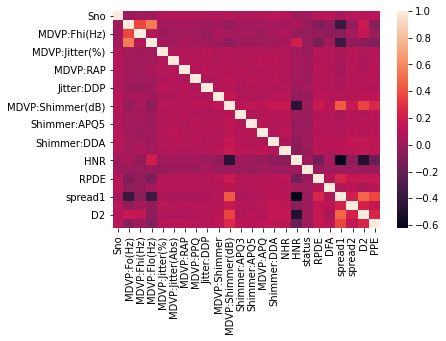

In [10]:
import seaborn as sns
sns.heatmap(parkinsons_data.corr())

In [14]:
cor = parkinsons_data.corr()['status']
print(cor.sort_values(ascending=False))
print(type(cor))


status              1.000000
Jitter:DDP          0.043092
DFA                 0.022984
spread2             0.020210
Shimmer:DDA         0.018020
Sno                 0.013484
MDVP:APQ            0.012902
HNR                 0.012140
MDVP:RAP            0.011753
MDVP:Jitter(Abs)    0.010152
PPE                 0.008660
MDVP:Shimmer(dB)    0.007674
MDVP:PPQ            0.006504
D2                  0.006340
Shimmer:APQ3        0.006287
MDVP:Jitter(%)      0.002123
NHR                 0.000301
RPDE                0.000195
spread1            -0.000307
MDVP:Shimmer       -0.002906
MDVP:Flo(Hz)       -0.004622
MDVP:Fo(Hz)        -0.004715
MDVP:Fhi(Hz)       -0.013102
Shimmer:APQ5       -0.014902
Name: status, dtype: float64
<class 'pandas.core.series.Series'>


In [15]:
#parkinsons_data = parkinsons_data.drop(columns=['MDVP:Fhi(Hz)','MDVP:Jitter(%)','MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'NHR', 'DFA'], axis=1)

In [16]:
X = parkinsons_data.drop(columns=['Sno','status','RPDE','spread1','NHR'], axis = 1)
Y = parkinsons_data['status']

In [17]:
print(X)

      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0      119.992000    157.302000     74.997000        0.007840   
1      122.400000    148.650000    113.819000        0.009680   
2      116.682000    131.111000    111.555000        0.010500   
3      116.676000    137.871000    111.366000        0.009970   
4      116.014000    141.781000    110.655000        0.012840   
...           ...           ...           ...             ...   
6040   190.684866    311.372211    106.021678        0.970469   
6041   246.279716    328.363501    120.207867        0.848412   
6042   191.557424    261.275238     87.053381        0.956326   
6043   203.160945    422.342138     87.203737        0.361238   
6044   221.387286    350.025216     92.254156        0.862029   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.000070  0.003700  0.005540    0.011090      0.043740   
1             0.000080  0.004650  0.006960    0.013940      0.061340   
2  

In [18]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
6040    1
6041    1
6042    1
6043    1
6044    1
Name: status, Length: 6045, dtype: int64


In [19]:
"""Splitting the data into training and test data"""

X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size = 0.2, random_state=0)

print(X.shape, X_train.shape, X_test.shape)


(6045, 19) (4836, 19) (1209, 19)


In [46]:
"""# DATA STANDARDISATIION"""

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

[[0.25504193 0.33009455 0.27433394 ... 0.25892686 0.34698023 0.78736075]
 [0.64243529 0.27569785 0.64185207 ... 0.78788849 0.44730856 0.24832216]
 [0.48103274 0.13243175 0.21497011 ... 0.52067276 0.42968184 0.26675156]
 ...
 [0.47404559 0.10980927 0.14039999 ... 0.56272988 0.39013935 0.20452794]
 [0.20025767 0.15622785 0.31938815 ... 0.72191775 0.38882913 0.36382517]
 [0.20176682 0.1074444  0.31095873 ... 0.43556064 0.49076542 0.72742221]]


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

In [47]:
"""# Suport vector machine model"""

from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[   0  149]
 [   0 1060]]


0.8767576509511993

In [48]:
# K - Nearest Neighbour classifier


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[   2  147]
 [   2 1058]]


0.8767576509511993

In [49]:
"""# Random Forest Algorithm"""

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

y_pred1 = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred1)
print(cm)
accuracy_score(Y_test, y_pred1)

[[   0  149]
 [   2 1058]]


0.8751033912324235